In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,datetime,os

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Sequential,Model
from keras.layers import Activation,Dense,concatenate,Input,Dropout,LSTM,Conv2D,BatchNormalization,Flatten

from sklearn.preprocessing import StandardScaler,OneHotEncoder,CategoricalEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.spatial import distance_matrix

warnings.filterwarnings('ignore')
sns.set()

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def cluster_quality(data,cl):
    DI = distance_matrix(data,cl,2)
    quality = [DI[:,k].mean() for k in range(cl.shape[0])]
    quality = np.stack(quality,axis=0)
    return quality

In [3]:
def clq(cl):
    clc  = np.mean(cl,axis=0)
    quality = 1/np.mean((cl-clc)**2)
    return quality

In [119]:
K = 2

data0 = 0.7*rnd.rand(25,2)
data1 = -0.9*rnd.rand(25,2)
data = np.append(data0,data1,axis=0) 

rnd.shuffle(data)

In [120]:
L = 5
U = 45
delta = 0.5

gap = 20

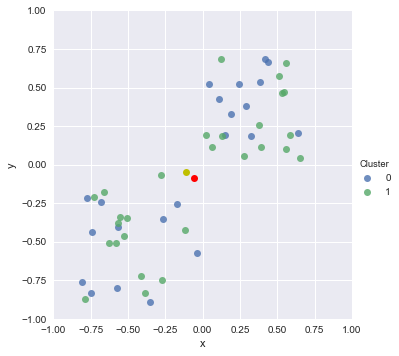

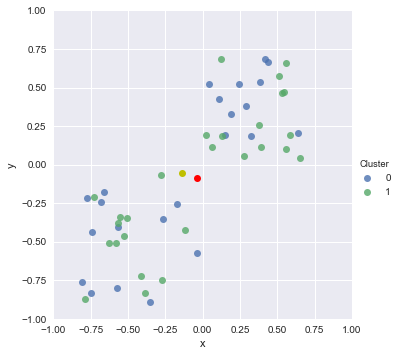

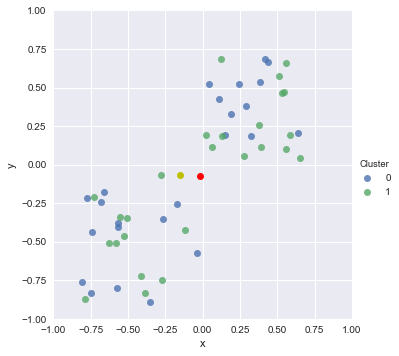

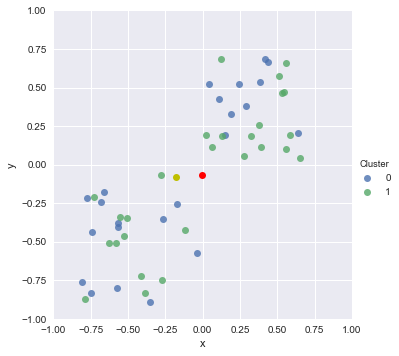

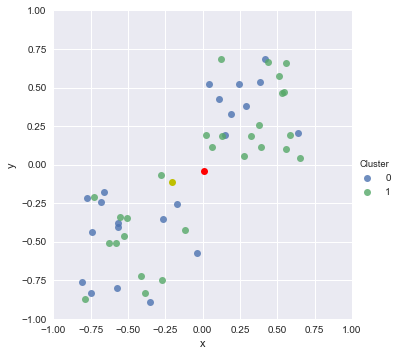

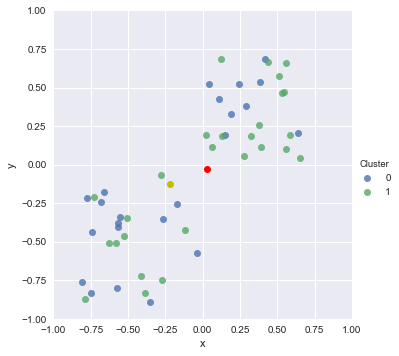

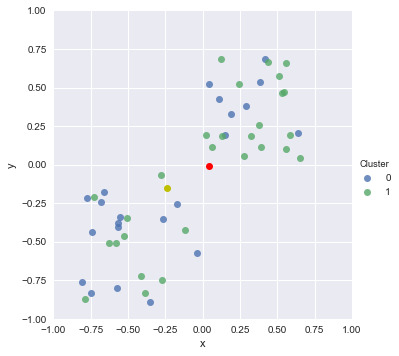

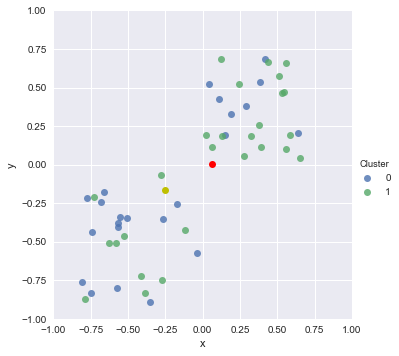

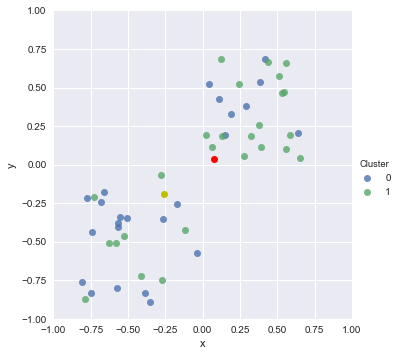

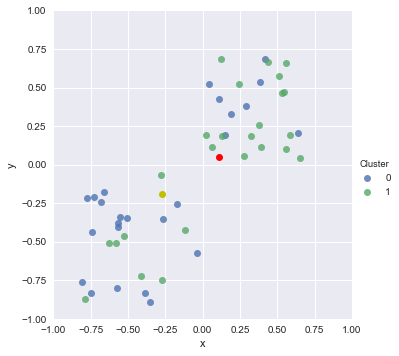

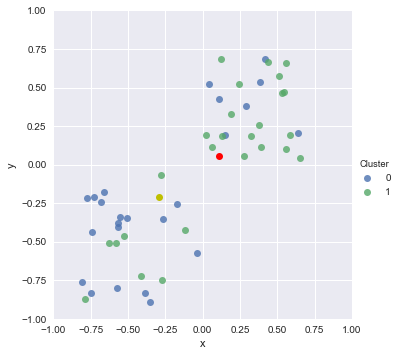

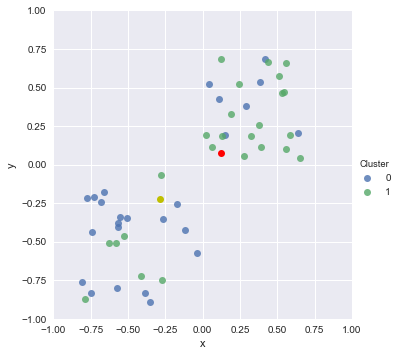

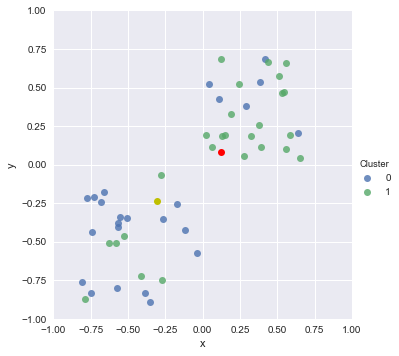

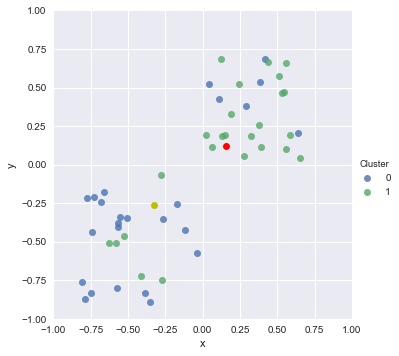

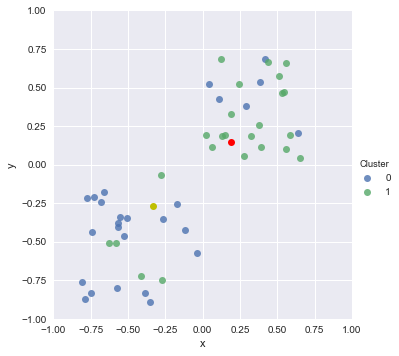

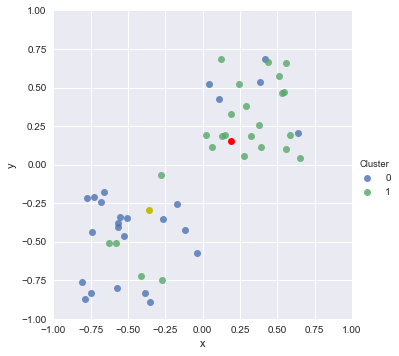

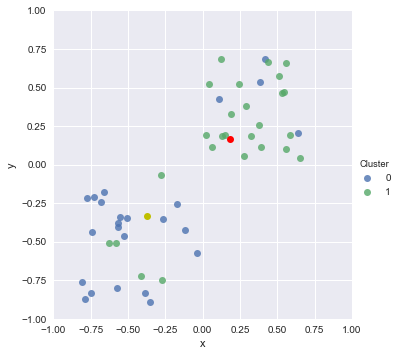

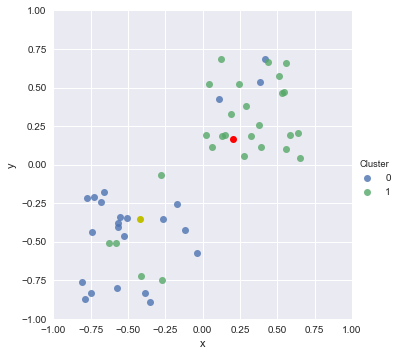

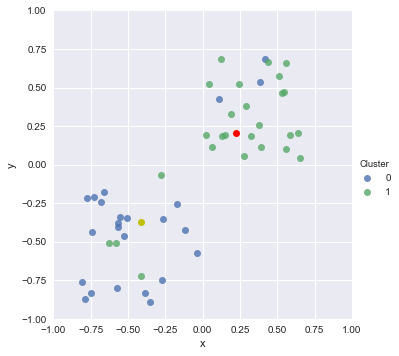

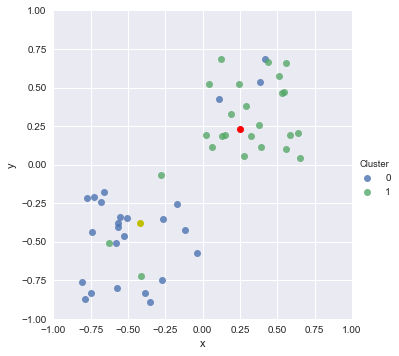

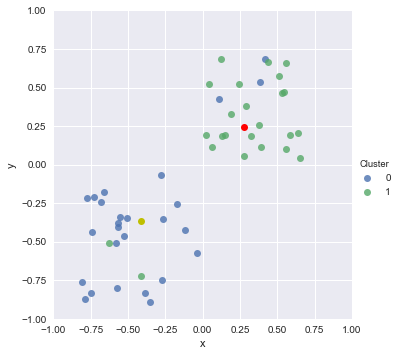

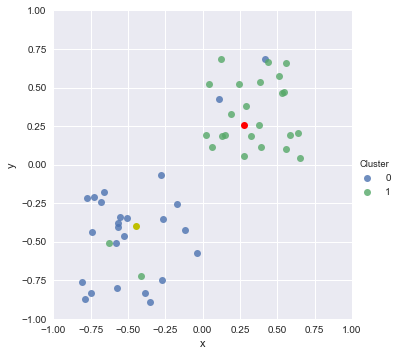

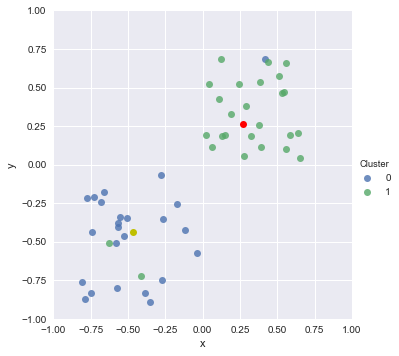

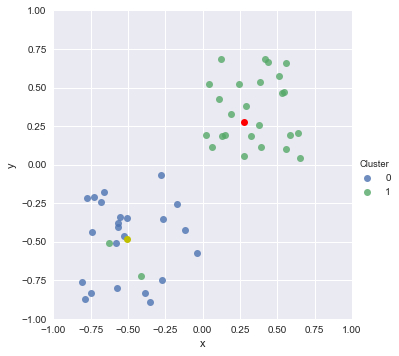

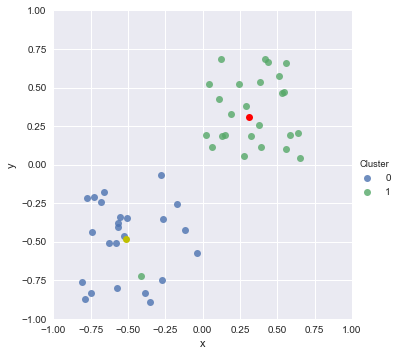

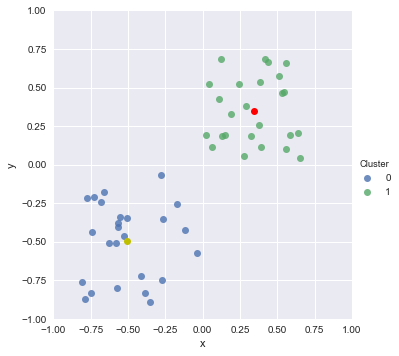

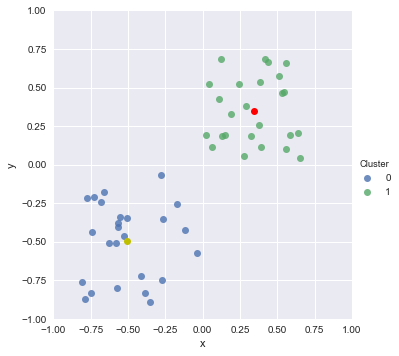

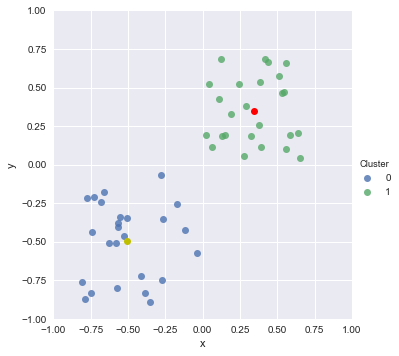

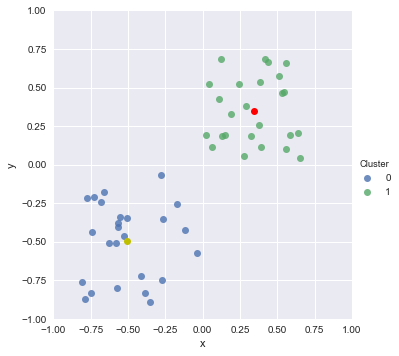

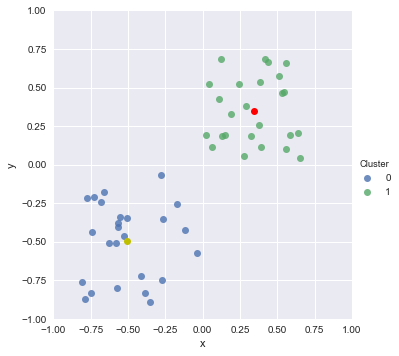

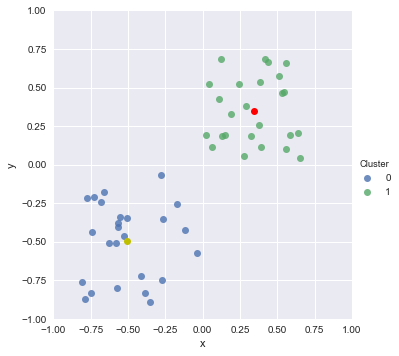

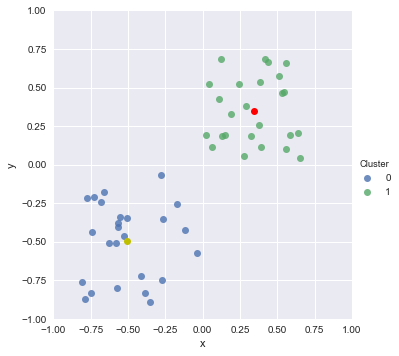

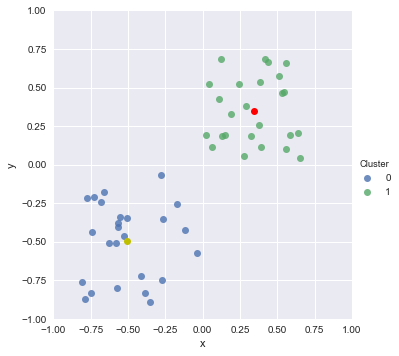

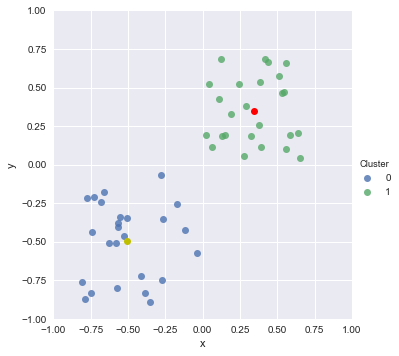

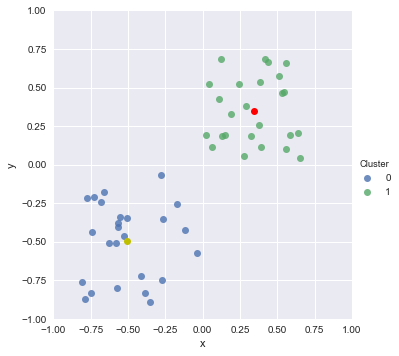

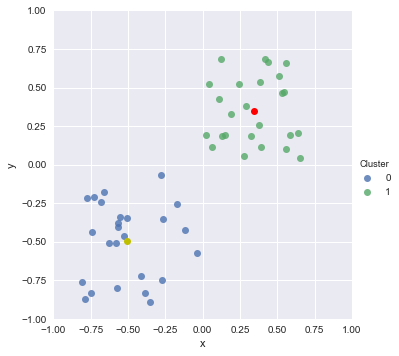

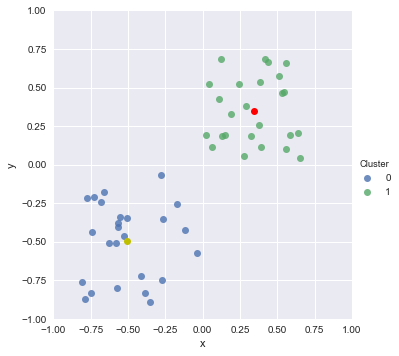

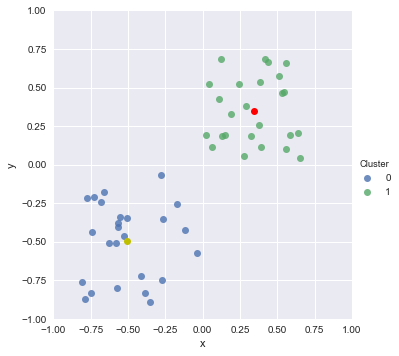

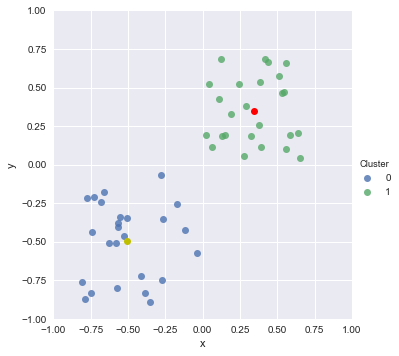

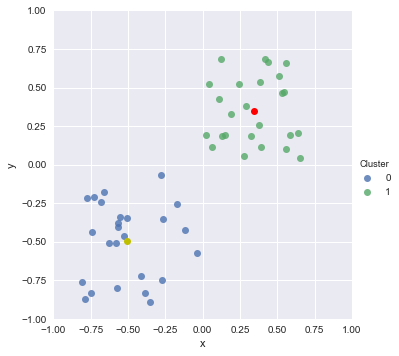

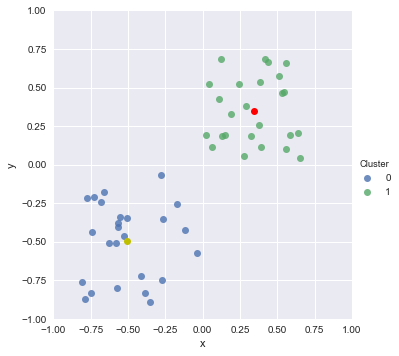

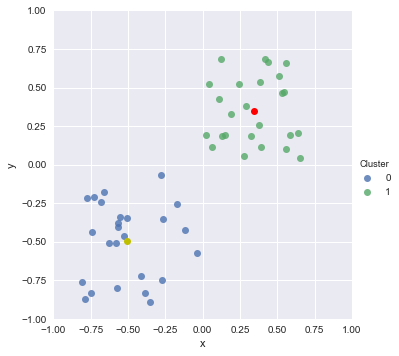

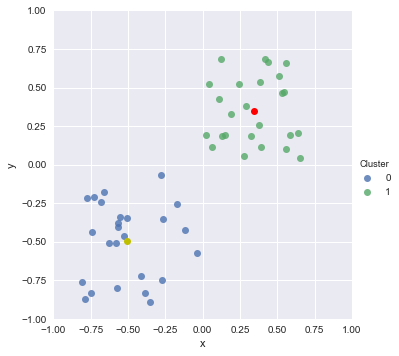

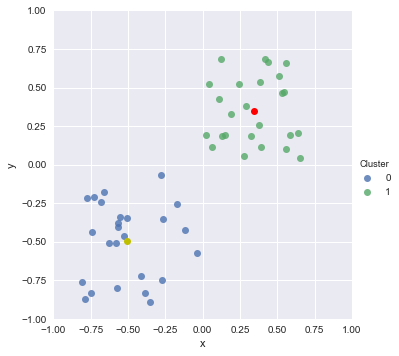

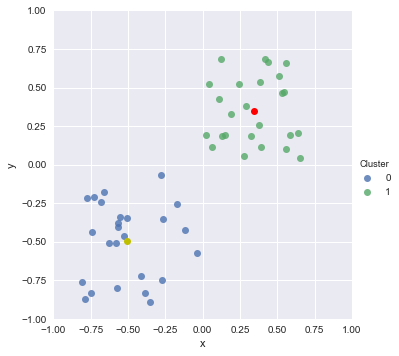

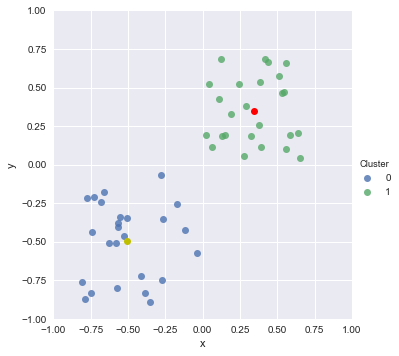

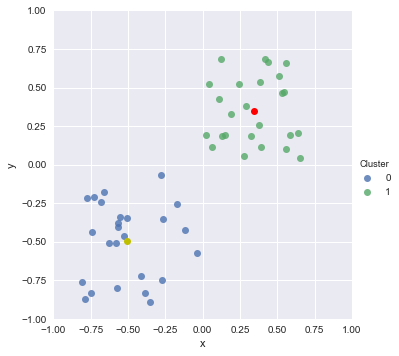

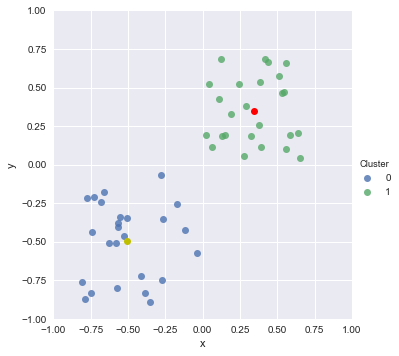

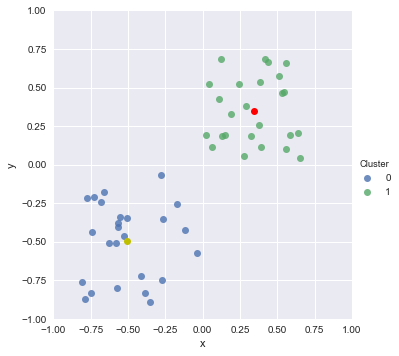

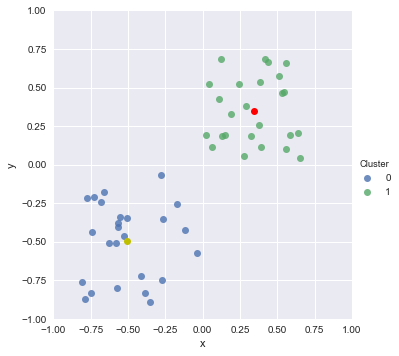

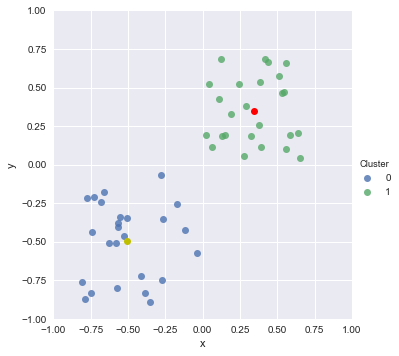

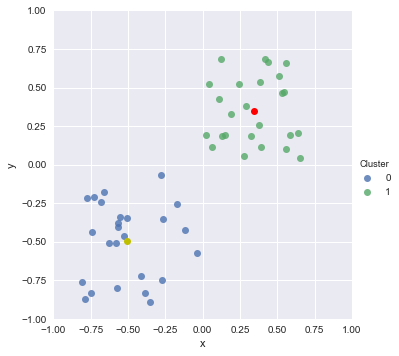

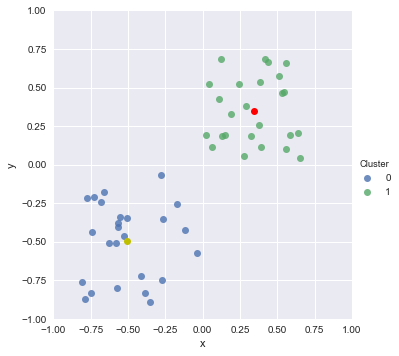

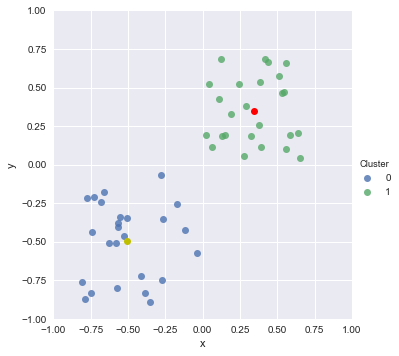

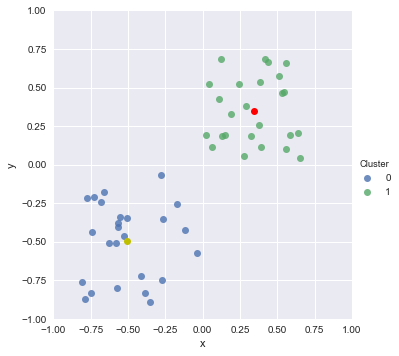

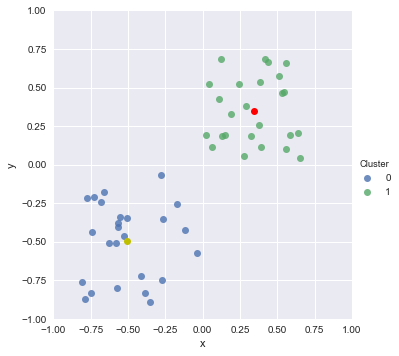

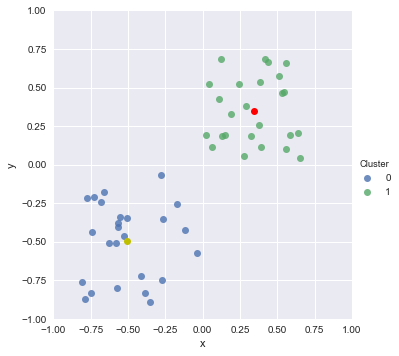

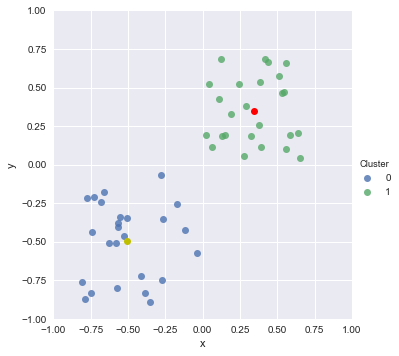

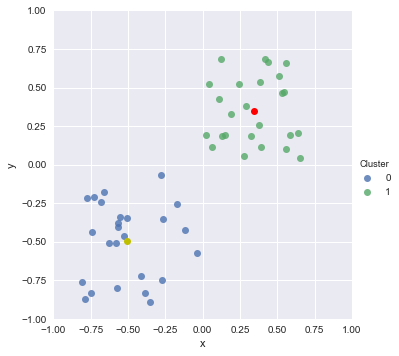

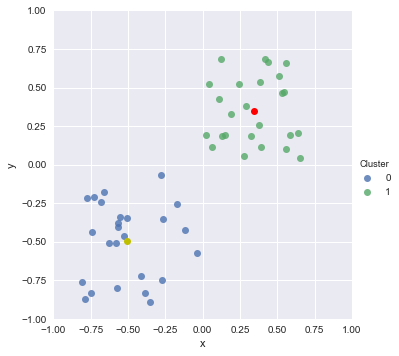

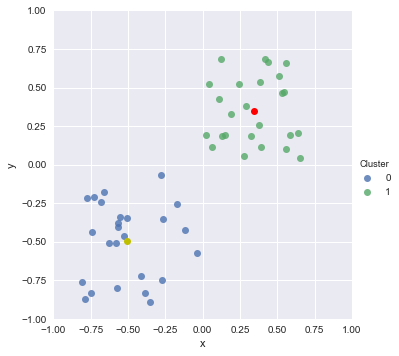

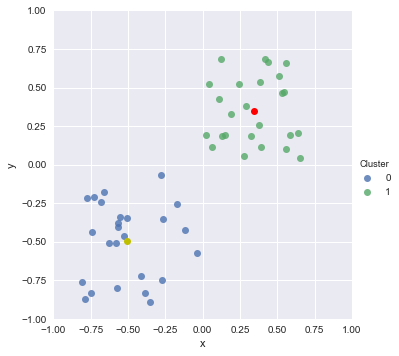

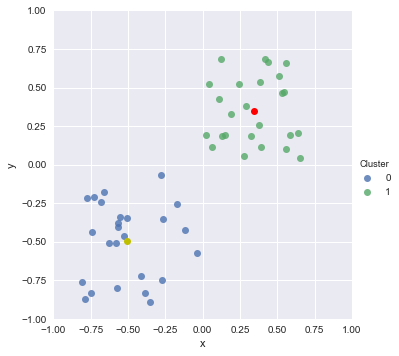

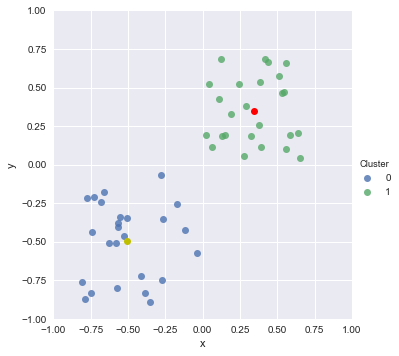

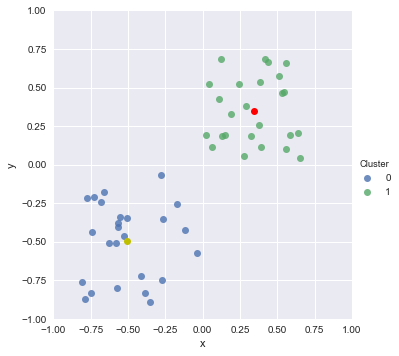

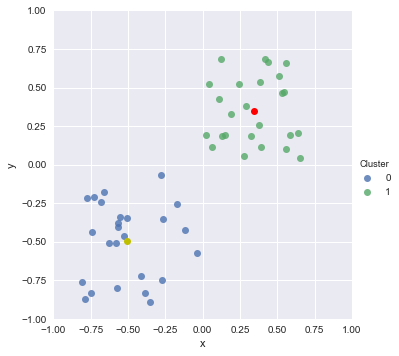

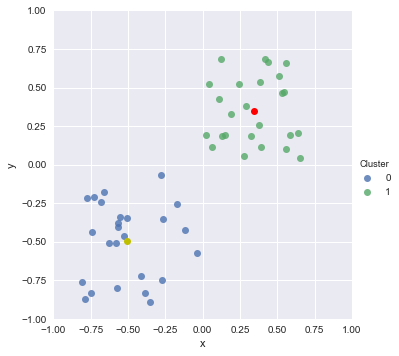

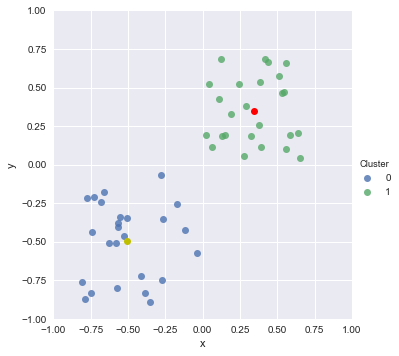

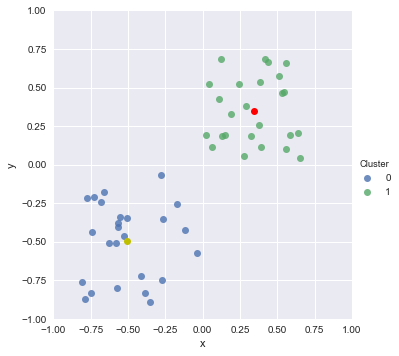

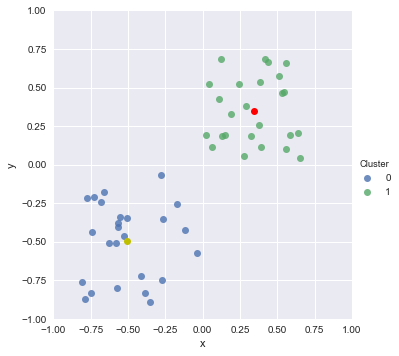

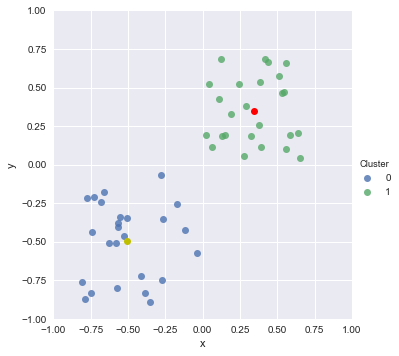

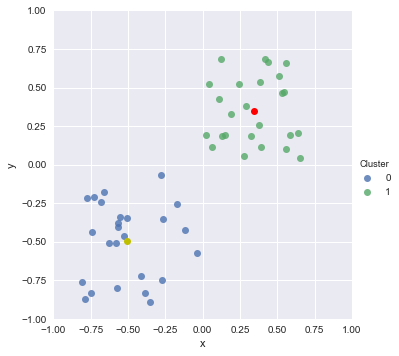

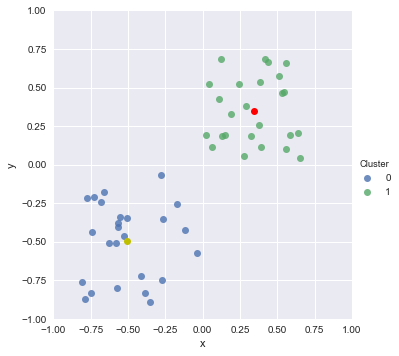

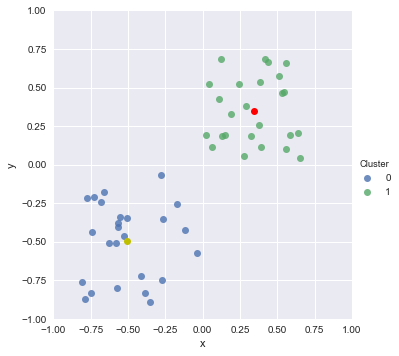

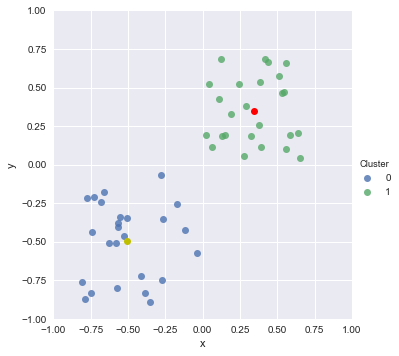

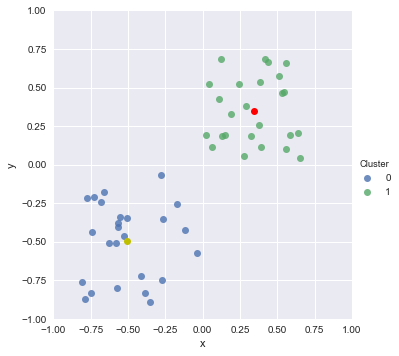

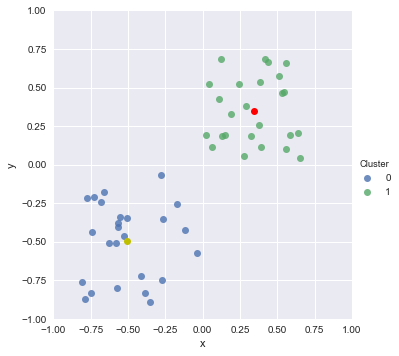

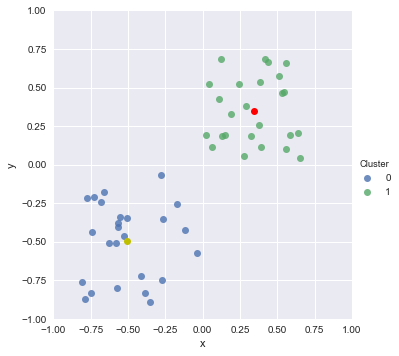

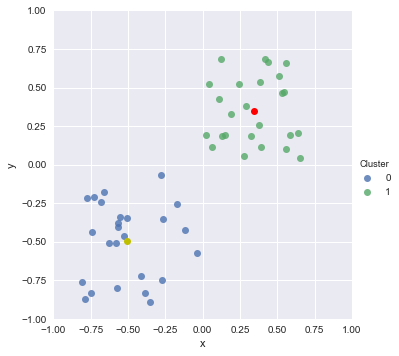

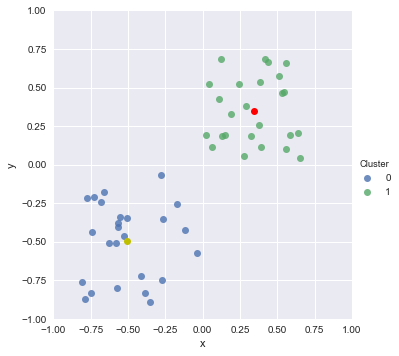

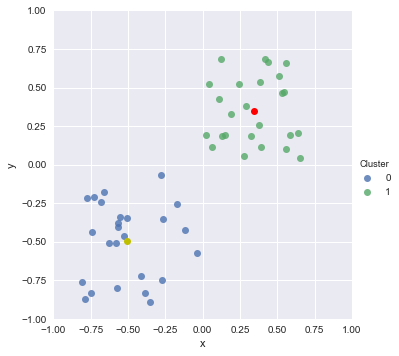

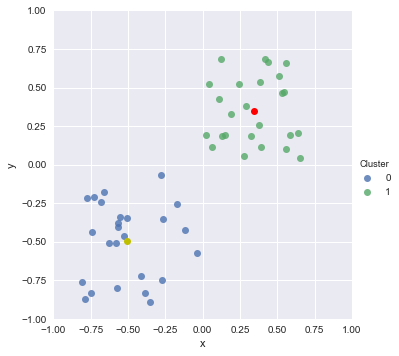

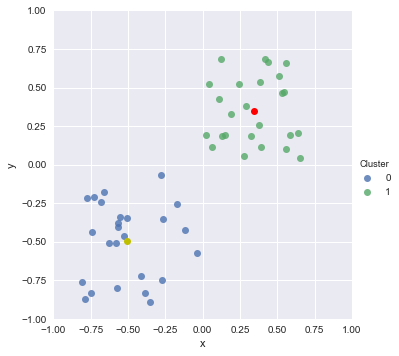

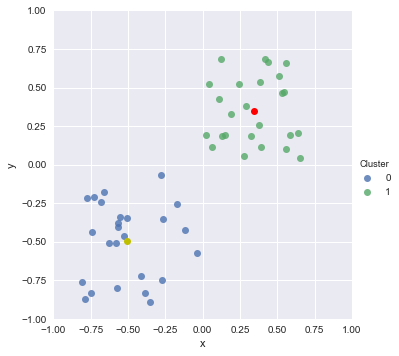

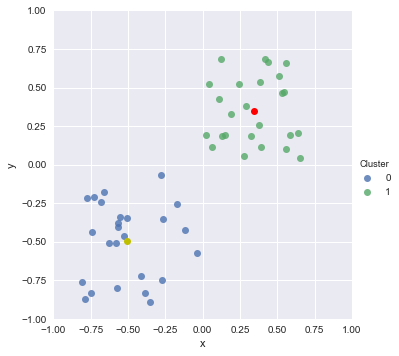

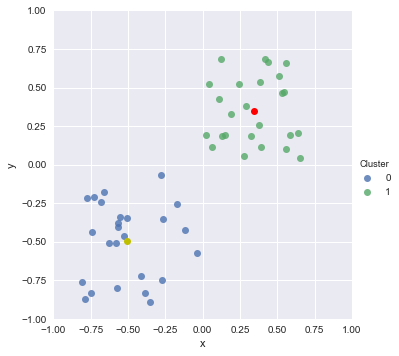

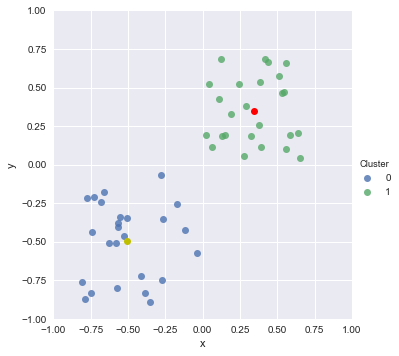

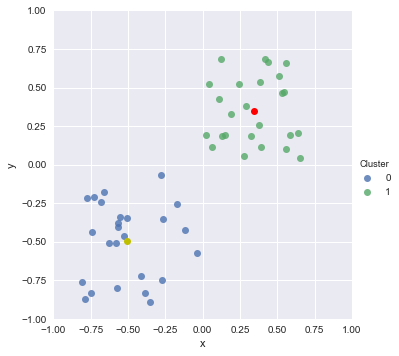

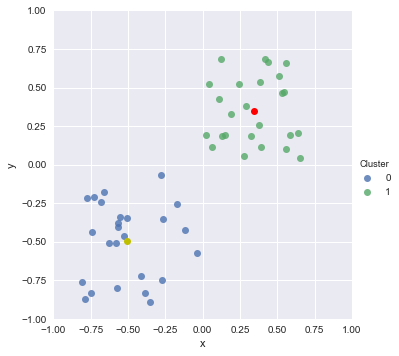

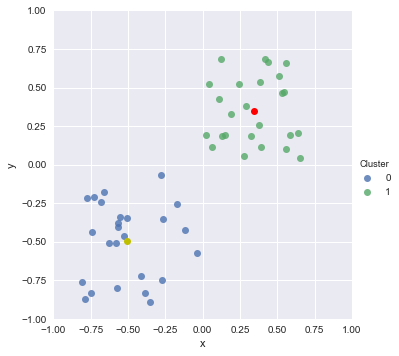

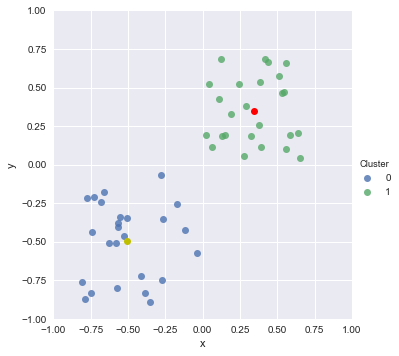

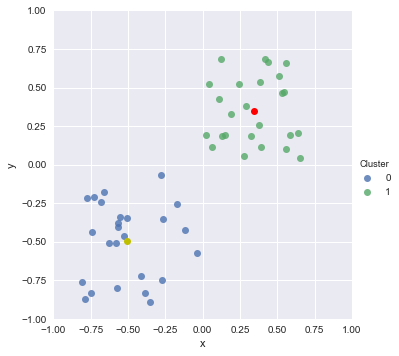

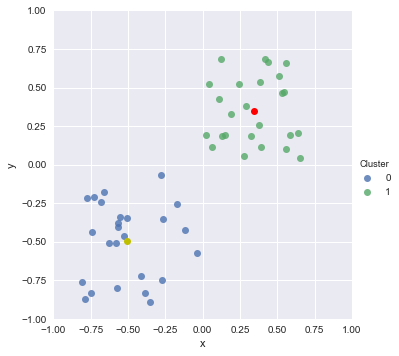

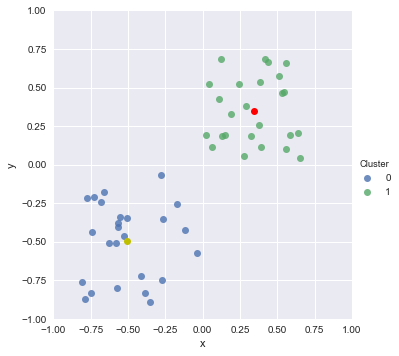

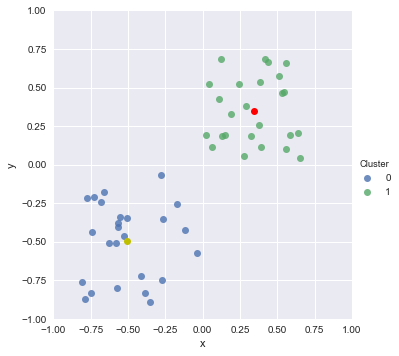

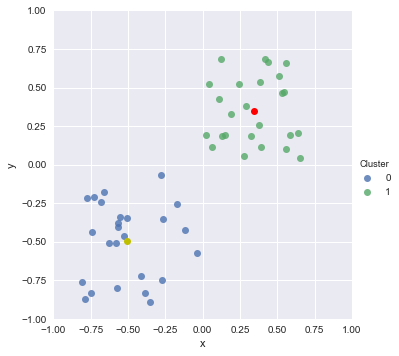

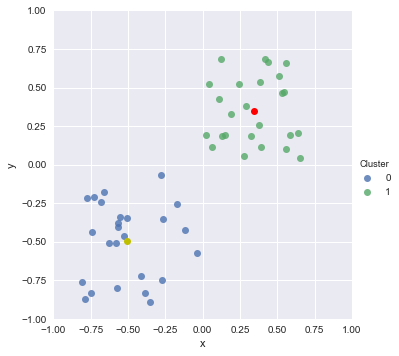

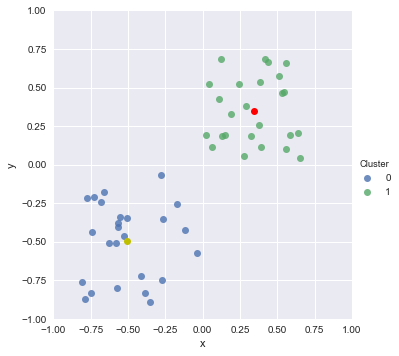

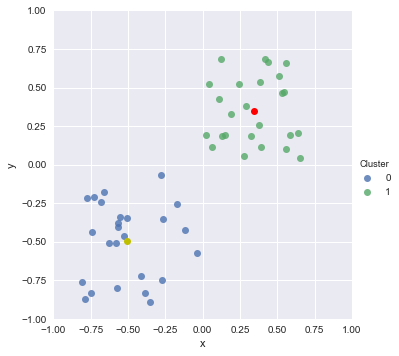

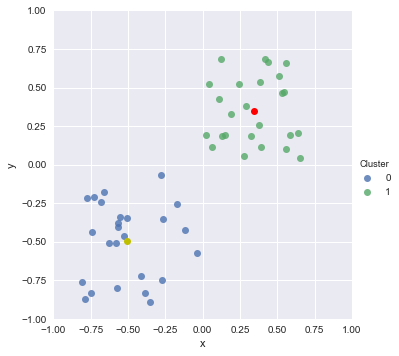

In [121]:
visited = np.zeros(shape=[data.shape[0]]) 
cluster_assignment = rnd.randint(0,K,50)

for iterations in range(100):

    df = pd.DataFrame({
        'x':data[:,0],
        'y':data[:,1],
        'Cluster':cluster_assignment
    })
    cl = np.zeros(shape=(K,2))
    for k in range(K):
        cl[k,:] = df[df['Cluster']==k][['x','y']].mean().values

    sns.lmplot(x='x',y='y',data=df,hue='Cluster',fit_reg=False)
    plt.plot(cl[0,0],cl[0,1],'yo')
    plt.plot(cl[1,0],cl[1,1],'ro')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()
        
    DI = distance_matrix(data,cl,2)

    wt = np.zeros(shape=[data.shape[0]])
    MOVELIST = []
    for k in range(data.shape[0]):

        cold = cluster_assignment[k]
        cnew = np.argmin(DI[k,:])

        cold_idx = np.where(cluster_assignment==cold)[0]
        cnew_idx = np.where(cluster_assignment==cnew)[0]
        cluster_cold_mod = data[np.delete(cold_idx,np.where(cold_idx==k)[0]),:]
        cold_qual = clq(cluster_cold_mod)

        MOVELIST.append([k,cold,cnew])
        if cold_idx.shape[0]>L and cnew_idx.shape[0]<U and cold_qual>=delta:
            wt[k] = DI[k,cold]-DI[k,cnew]

    wtn = wt/wt.sum()

    chidx = rnd.choice(np.arange(0,wtn.shape[0]),p=wtn)

    move_idx = MOVELIST[chidx][0]
    move_root = MOVELIST[chidx][1]
    move_target = MOVELIST[chidx][2]

    cluster_assignment[move_idx] = move_target

    if np.where(cluster_assignment==move_target)[0].shape[0]==U or visited[move]>0:
        cluster_assignment[move_idx] = move_root
        continue

    visited[np.where(visited>0)[0]] -= 1

    visited[move_idx] += gap

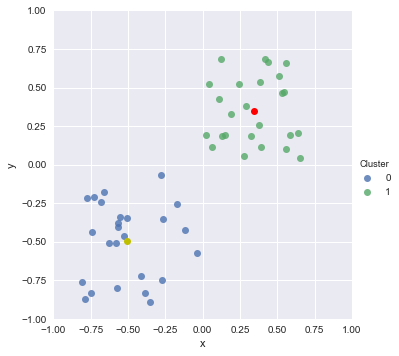

KMeans MSE --> 0.00002
OPTMOVE MSE --> 1.84434


In [122]:
sns.lmplot(x='x',y='y',data=df,hue='Cluster',fit_reg=False)
plt.plot(cl[0,0],cl[0,1],'yo')
plt.plot(cl[1,0],cl[1,1],'ro')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

km = KMeans(n_clusters=2)
km.fit(data)

kmc0 = km.cluster_centers_[0,:]
kmc1 = km.cluster_centers_[1,:]
omc0 = df[df['Cluster']==0][['x','y']].mean().values
omc1 = df[df['Cluster']==1][['x','y']].mean().values

c0mean = np.mean(0.7*rnd.rand(10000,2),axis=0)
c1mean = np.mean(-0.9*rnd.rand(10000,2),axis=0)

errKM = np.sum(np.sum((kmc0-c0mean)**2)**2+np.sum((kmc1-c1mean)**2)**2)/2
errOM = np.sum(np.sum((omc0-c0mean)**2)**2+np.sum((omc1-c1mean)**2)**2)/2

print('KMeans MSE --> %.5f\nOPTMOVE MSE --> %.5f'%(errKM,errOM))

In [123]:
km.labels_

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1])